### Problem Statement

To reduce customer churn, the telecom companie needs to predict which customers are at high risk of churn. churn prediction is usually more critical (and non-trivial) for prepaid customers. In this project, you will use the usage-based definition to define churn. 

**Usage-based churn:** Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.



#### Loading Packages

In [125]:
# Loading packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)


import warnings

warnings.filterwarnings("ignore")

#### Loading data

In [126]:
# Reading data set
churn = pd.read_csv("telecom_churn_data.csv")
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [127]:
# General Information
print(churn.dtypes)
print(churn.shape)

mobile_number                 int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               

In [128]:
#setting mobile numer as the index column
churn.set_index("mobile_number", inplace =True)

In [129]:
churn.describe()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.

In [130]:
# Finding the columns with no variance. That is only one value is present in all the rows of that feature.
churn.describe().columns[churn.describe().loc['std'] == 0]

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')

In [131]:
# Dropiing all these columns as these are not useful for the analysis.
churn.drop(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'], axis = 1, inplace = True)

# 1. Missing value treatment

In [132]:
# Checking for missing values
print(round(100 * (churn.isnull().sum() / len(churn)), 2))

last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2t_mou_8             5.38
loc_og_t2t_mou_9             7.75
loc_og_t2m_mou_6             3.94
loc_og_t2m_mou

In [133]:
# Checking for the columns where missing value is more than 70%
high_missing_cols = churn.columns[churn.isnull().mean() > 0.7]
high_missing_cols

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

Dropping the `date_of_last_rech_data_6`, `date_of_last_rech_data_7`,`date_of_last_rech_data_8`, `date_of_last_rech_data_9` columns as these columns will be not mych usefull for the modelling as these columns have more than 70% data missing.

In [134]:
churn.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 
            'date_of_last_rech_data_9'], axis = 1, inplace = True)

Working on the data rechanges features. Cheing the general distributions about the data.

In [135]:
# Information about the data recharge columns
data_rech_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 
                  'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 
                  'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                   'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']

churn[data_rech_cols].describe()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,7546.000000,4365.000000,4076.000000,4061.000000


**Looking for the pattern in trems of  data recharge in 4 months for missing value treatment**


In [136]:
churn[data_rech_cols].head()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
mobile_number,,,,,,,,,,,,,,,,,,,,
7000842753,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN
7001865778,NaN,1.0,2.0,NaN,NaN,154.0,25.0,NaN,NaN,1.0,2.0,NaN,NaN,0.0,0.0,NaN,NaN,154.0,50.0,NaN
7001625959,NaN,NaN,NaN,1.0,NaN,NaN,NaN,46.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,46.0
7001204172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7000142493,1.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN


All these missing values can be replaced with 0 based on the assumption that number of 0 recharge or 0mb or data recharge with 0 rupee is not going to make the data set bias.

In [137]:
# Imputing missing values with 0
churn[data_rech_cols] = churn[data_rech_cols].fillna(0)

In [138]:
# Checking the imputation is correct or not
churn[data_rech_cols].isnull().sum()

total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
total_rech_data_9     0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
max_rech_data_9       0
count_rech_2g_6       0
count_rech_2g_7       0
count_rech_2g_8       0
count_rech_2g_9       0
count_rech_3g_6       0
count_rech_3g_7       0
count_rech_3g_8       0
count_rech_3g_9       0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
av_rech_amt_data_9    0
dtype: int64

**Looking for the pattern in Average Rating/User (arpu) 2g and 3g data for missing value treatment**

In [139]:
arpu_cols = ['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9']
churn[arpu_cols].describe()

,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,89.555057,89.384120,91.173849,100.264116,86.398003,85.914450,86.599478,93.712026
std,193.124653,195.893924,188.180936,216.291992,172.767523,176.379871,168.247852,171.384224
min,-30.820000,-26.040000,-24.490000,-71.090000,-35.830000,-15.480000,-55.830000,-45.740000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.480000,0.420000,0.880000,2.605000,10.830000,8.810000,9.270000,14.800000
75%,122.070000,119.560000,122.070000,140.010000,122.070000,122.070000,122.070000,140.010000
max,6362.280000,4980.900000,3716.900000,13884.310000,6433.760000,4809.360000,3483.170000,3467.170000


These are also highly skewed columns and we have other column to get arpu total. And imputing the missing vaues with 0 assuming that those customer did `not do data rechange` at all. So they do not have any rating.

In [140]:
# Imputing missing values with 0
churn[arpu_cols] = churn[arpu_cols].fillna(0)

**Looking for the pattern in night pack user data and fb user data for missing value treatment**

In [141]:
cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 
        'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']

for col in cols:
    print(f"{col} --> {churn[col].unique()}")

night_pck_user_6 --> [ 0. nan  1.]
night_pck_user_7 --> [ 0. nan  1.]
night_pck_user_8 --> [ 0. nan  1.]
night_pck_user_9 --> [nan  0.  1.]
fb_user_6 --> [ 1. nan  0.]
fb_user_7 --> [ 1. nan  0.]
fb_user_8 --> [ 1. nan  0.]
fb_user_9 --> [nan  1.  0.]


In [142]:
# checking skewness of these columns
churn[['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']].describe()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,0.025086,0.023034,0.020844,0.015971,0.914404,0.908764,0.890808,0.860968
std,0.156391,0.150014,0.142863,0.125366,0.279772,0.287950,0.311885,0.345987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


These columns have around 75% missing values and imputing all the missing values assuming non user with 0 will create high data imbalance. So we are dropping thise columns.

In [143]:
# Dropping all the night pack and fb user columns
churn.drop(cols, axis =1, inplace = True)

As we can check if the person is actually using the service or not by checking the count of recharge columns and usage, we have decided to drop these date columns as these are not usefull for teh analysis.

In [144]:
date_cols = [col for col in churn.columns if "date" in col]
date_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [145]:
# Dropping all the date columns
churn.drop(date_cols, axis=1, inplace = True)

**Imputing all the outgoing columns**

In [146]:
# Imputing all the local outgoing columns missing value with 0
local_og = [col for col in churn.columns if "loc_og" in col]
churn[local_og] = churn[local_og].fillna(0)

In [147]:
# Imputing all the local outgoing columns missing value with 0
std_og = [col for col in churn.columns if "std_og" in col]
churn[std_og] = churn[std_og].fillna(0)

In [148]:
# Imputing all the local outgoing columns missing value with 0
isd_og = [col for col in churn.columns if "isd_og" in col]
churn[isd_og] = churn[isd_og].fillna(0)

In [149]:
# Imputing all the local outgoing columns missing value with 0
spl_og = [col for col in churn.columns if "spl_og" in col]
churn[spl_og] = churn[spl_og].fillna(0)

In [150]:
# Imputing all the local outgoing columns missing value with 0
og_others = [col for col in churn.columns if "og_others" in col]
churn[og_others] = churn[og_others].fillna(0)

**Imputing all the incoming columns**

In [151]:
# Imputing all the local outgoing columns missing value with 0
loc_ic = [col for col in churn.columns if "loc_ic" in col]
churn[loc_ic] = churn[loc_ic].fillna(0)

In [152]:
# Imputing all the local outgoing columns missing value with 0
std_ic = [col for col in churn.columns if "std_ic" in col]
churn[std_ic] = churn[std_ic].fillna(0)

In [153]:
# Imputing all the local outgoing columns missing value with 0
isd_ic = [col for col in churn.columns if "isd_ic" in col]
churn[isd_ic] = churn[isd_ic].fillna(0)

In [154]:
# Imputing all the local outgoing columns missing value with 0
spl_ic = [col for col in churn.columns if "spl_ic" in col]
churn[spl_ic] = churn[spl_ic].fillna(0)

In [155]:
# Imputing all the local outgoing columns missing value with 0
ic_others = [col for col in churn.columns if "ic_others" in col]
churn[ic_others] = churn[ic_others].fillna(0)

**Filtering rest of the missing value columns for analysis and imputation**

In [156]:
missing_value_cols = churn.columns[churn.isnull().sum() > 0]
missing_value_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9'],
      dtype='object')

In [157]:
# Imputing missing valeus with respective medians
for col in missing_value_cols:
    churn[col] = churn[col].fillna(churn[col].median())

In [158]:
print(round(100*churn.isnull().sum()/len(churn) , 2))

arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_mou_9      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8

**Creating Total Recharge Amount derived for the month 6,7 and 8 to identify the high value customer**

In [159]:
churn['total_rech_amt_data_6'] = churn['av_rech_amt_data_6'] * churn['total_rech_data_6']
churn['total_rech_amt_data_7'] = churn['av_rech_amt_data_7'] * churn['total_rech_data_7']
churn['total_rech_amt_data_8'] = churn['av_rech_amt_data_8'] * churn['total_rech_data_8']

As we have derived new column, we are dropping average data recharge columns as these are redundant.

In [160]:
# Dropping all the average data recharge amount columns
churn.drop(['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'], axis = 1, inplace = True)

Creating total_amt column by adding up `total_rech_amt_data` + `total_rech_amt`

In [161]:
churn['total_amt_6'] = churn['total_rech_amt_6'] + churn['total_rech_amt_data_6']
churn['total_amt_7'] = churn['total_rech_amt_7'] + churn['total_rech_amt_data_7']

As we have to build the model on the high valued customer, we are creating a label = 1 for high value customer.
For that we need to take the average of the month 6 and 7 total amount. and then 70 percentile will be the cut off to decide if a customer is `good customer` or not.

In [162]:
churn['avg_of_6_7'] = ((churn['total_amt_6'] + churn['total_amt_7'])/2).round(2)
churn.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_amt_6,total_amt_7,avg_of_6_7
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58,252.0,252.0,252.0,614.0,504.0,559.0
7001865778,34.047,355.074,

In [163]:
churn.shape

(99999, 196)

In [164]:
# Cutoff of 70% to decide the good customer based on avegare recharge of the month 6 and 7
cutoff = churn['avg_of_6_7'].quantile(0.7)
cutoff

478.0

Filtering high value customer data frame.

In [165]:
# Filtering based on the cutoff value
hvc = churn.loc[churn['avg_of_6_7'] >= cutoff]
hvc

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_amt_6,total_amt_7,avg_of_6_7
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,614.0,504.0,559.0
7000701601,106

**So we have around 30001 high value curtomer in the data**

Dropping `avg_of_6_7`,`total_amt_6`,`total_amt_7` derived columns

In [166]:
# Dropping these colums as these are redundant and we dont need for the analysis
hvc.drop(['avg_of_6_7','total_amt_6','total_amt_7'], axis = 1, inplace = True)

### Deriving churn column based on
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [167]:
hvc[["total_ic_mou_9", "total_og_mou_9" ,"vol_2g_mb_9", "vol_3g_mb_9"]].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
mobile_number,,,,
7000842753,0.00,0.00,0.00,0.00
7000701601,0.00,0.00,0.00,0.00
7001524846,34.91,142.18,0.00,0.00
7002124215,252.61,1031.53,0.00,0.00
7000887461,127.48,127.63,13.93,314.74


In [168]:
# Creating the total usage column for the month 9
hvc["total_usage_9"] = hvc["total_ic_mou_9"]+hvc["total_og_mou_9"]+hvc["vol_2g_mb_9"] + hvc["vol_3g_mb_9"]

In [169]:
hvc["total_usage_9"].head()

mobile_number
7000842753       0.00
7000701601       0.00
7001524846     177.09
7002124215    1284.14
7000887461     583.78
Name: total_usage_9, dtype: float64

In [170]:
# Creating churn column
def is_churn(x):
    if x == 0:
        return 1
    else:
        return 0

hvc["churn"] = hvc["total_usage_9"].apply(is_churn)

In [171]:
# dropping all the columns which are related to the churn phase "9" as we have already derived churn column
nine_cols = [col for col in hvc.columns if "9" in col]
hvc.drop(nine_cols, axis = 1, inplace=True)

In [172]:
hvc.shape

(30001, 147)

In [173]:
hvc.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,churn
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,1
7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1
7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.630,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0

In [174]:
# checking data imbalance in target column
sum(100*hvc["churn"] / len(hvc))

8.136395453485196

Only 8% of the high value customer are churn in 9th month

# 2. Data Preperation

In [175]:
# Copying the dataframe into df for further analysis
df = hvc.copy()

In [176]:
df

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,churn
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,1
7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1
7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.630,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,1

### Outliers Treatment

In [177]:
X = df.drop("churn", axis = 1)
y = df["churn"]

In [178]:
for col in X.columns:
    percentiles = df[col].quantile([0.15,0.90]).values
    X[col][X[col] <= percentiles[0]] = percentiles[0]
    X[col][X[col] >= percentiles[1]] = percentiles[1]

In [179]:
X.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,526.686805,528.00

In [180]:
df = pd.concat([X,y], axis = 1)
df.shape

(30001, 147)

In [181]:
# Checking for the unique values in data frame
for col in df.columns:
    print(f"{col} --> {df[col].unique()}")
    print(f"count: {len(df[col].unique())}")
    print("------------------")

arpu_6 --> [220.246 994.099 378.721 ... 644.973 312.558 322.991]
count: 22095
------------------
arpu_7 --> [225.491 995.859 492.223 ... 455.228 512.932 303.386]
count: 22106
------------------
arpu_8 --> [213.803 977.345 142.68  ... 564.334 402.08  606.817]
count: 21967
------------------
onnet_mou_6 --> [ 34.31  57.84 413.69 ... 553.84 196.99 423.99]
count: 13510
------------------
onnet_mou_7 --> [ 32.33  54.68 351.03 ...  29.04 549.36 174.46]
count: 13648
------------------
onnet_mou_8 --> [  4.03  52.29  35.08 ... 301.58 251.91  63.91]
count: 12633
------------------
offnet_mou_6 --> [ 96.31 453.43  94.66 ...  56.13  39.51 784.76]
count: 16502
------------------
offnet_mou_7 --> [ 91.735 567.16   80.63  ... 116.16  617.13  277.01 ]
count: 16608
------------------
offnet_mou_8 --> [ 24.59 325.91 136.48 ... 707.68  61.44 595.44]
count: 15830
------------------
roam_ic_mou_6 --> [ 0.   16.23  3.06 ... 11.19 12.23  9.83]
count: 1401
------------------
roam_ic_mou_7 --> [0.000e+00 1.42

loc_ic_t2t_mou_8 --> [  0.74  27.31  19.54 ...  88.48   5.1  107.64]
count: 6549
------------------
loc_ic_t2m_mou_6 --> [ 12.14 217.56  57.58 ... 153.46 145.61 245.31]
count: 11807
------------------
loc_ic_t2m_mou_7 --> [ 14.34 221.49  74.63 ... 153.33 295.56 256.46]
count: 11770
------------------
loc_ic_t2m_mou_8 --> [  7.78 121.19  15.48 ... 100.78  46.04 251.89]
count: 11779
------------------
loc_ic_t2f_mou_6 --> [ 0.   38.01  4.61 ...  4.8  25.9  13.31]
count: 2344
------------------
loc_ic_t2f_mou_7 --> [ 0.   39.94  2.84 ... 27.84 38.88 32.99]
count: 2420
------------------
loc_ic_t2f_mou_8 --> [ 1.15 36.61  0.   ... 25.59 32.13 29.44]
count: 2294
------------------
loc_ic_mou_6 --> [ 21.99 427.88  81.43 ... 248.96 378.99 307.31]
count: 14387
------------------
loc_ic_mou_7 --> [ 25.36 355.23  87.68 ...  47.01 420.74 337.28]
count: 14225
------------------
loc_ic_mou_8 --> [ 14.63 188.04  15.79 ... 152.96 237.63 402.58]
count: 14323
------------------
std_ic_t2t_mou_6 --> [ 0

vol_3g_mb_7 --> [ 150.76    0.    750.95 ...  596.91 1129.34   13.56]
count: 7856
------------------
vol_3g_mb_8 --> [ 109.61    0.     11.94 ... 1012.7   926.78  678.74]
count: 7148
------------------
arpu_3g_6 --> [212.17   0.   216.65 ... 150.39 162.75  35.75]
count: 3658
------------------
arpu_3g_7 --> [212.17   0.   215.72 ...  36.69 156.38 105.64]
count: 3672
------------------
arpu_3g_8 --> [212.17   0.    19.83 ...  13.62 155.8   92.18]
count: 3447
------------------
arpu_2g_6 --> [212.17   0.    12.   ...  96.6  114.8   62.79]
count: 4039
------------------
arpu_2g_7 --> [212.17   0.    17.   ...  57.57  79.27   8.43]
count: 3908
------------------
arpu_2g_8 --> [212.17   0.   150.67 ...  36.63 167.1   10.58]
count: 3337
------------------
monthly_2g_6 --> [0 1]
count: 2
------------------
monthly_2g_7 --> [0 1]
count: 2
------------------
monthly_2g_8 --> [0 1]
count: 2
------------------
sachet_2g_6 --> [0 4 1 3 2]
count: 5
------------------
sachet_2g_7 --> [0 1 5 2 3 4]
c

In [182]:
# Removing all the columns that have only one value
df.drop(['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','og_others_7','og_others_8',
         'spl_ic_mou_7','spl_ic_mou_8','sachet_3g_8'], axis = 1, inplace =True)

#### Creating High Medium and Low category based on total_ic_mou of 6, 7 and 8 months

In [183]:
# Adding all the incoming to create total incoming
df["total_mou_ic"] = df["total_ic_mou_6"] + df["total_ic_mou_7"] + df["total_ic_mou_8"]

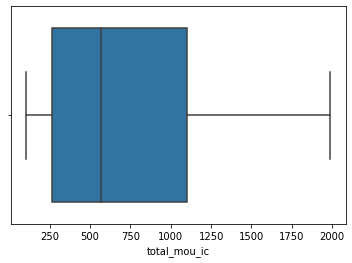

In [184]:
# Plotting total incoming distribution
sns.boxplot(df["total_mou_ic"]);

In [185]:
high = df["total_mou_ic"].quantile(.75)
mid = df["total_mou_ic"].quantile(.4)

high, mid

(1102.54, 427.83)

In [186]:
# Creating category based on incoming usage
def create_mou_cat_ic(x):
    if x >= high:
        return "High"
    elif x< high and x>=mid:
        return "Medium"
    else:
        return "Low"

df["mou_cat_ic"] = df["total_mou_ic"].apply(create_mou_cat_ic)

In [187]:
# Dropping total incoming derived column
df.drop("total_mou_ic", axis = 1, inplace = True)

#### Lets create High Medium and Low category based on total_og_mou of 6, 7 and 8 months

In [188]:
# Adding all the outgoing to create total outgoing column
df["total_mou_og"] = df["total_og_mou_6"] + df["total_og_mou_7"] + df["total_og_mou_8"]

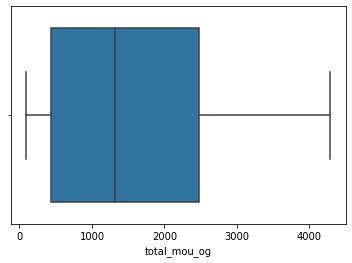

In [189]:
# Plotting the distribution of the outgoing
sns.boxplot(df["total_mou_og"]);

In [190]:
high = df["total_mou_og"].quantile(.75)
mid = df["total_mou_og"].quantile(.4)

high, mid

(2474.8599999999997, 933.3499999999999)

In [191]:
# Creating outgoing categories
def create_mou_cat_og(x):
    if x >= high:
        return "High"
    elif x< high and x>=mid:
        return "Medium"
    else:
        return "Low"

df["mou_cat_og"] = df["total_mou_og"].apply(create_mou_cat_og)

In [192]:
# Dropping total outgoing derived column
df.drop("total_mou_og", axis = 1, inplace = True)

#### Creating High Medium and Low category based on vol_2g_mb  of 6, 7 and 8

In [193]:
# Creating total 2g data usage
df["total_datavol_2g"] = df["vol_2g_mb_6"] + df["vol_2g_mb_7"] + df["vol_2g_mb_8"]

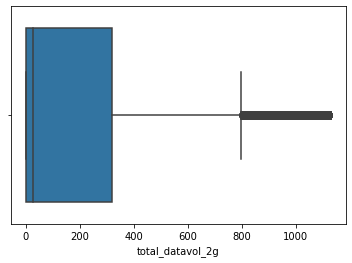

In [194]:
# Plotting the distributon
sns.boxplot(df["total_datavol_2g"]);

In [195]:
high = df["total_datavol_2g"].quantile(.9)
mid = df["total_datavol_2g"].quantile(.7)

high, mid

(780.39, 212.32999999999998)

In [196]:
# Creating categoring based on 2g usage
def create_datausage_cat_2g(x):
    if x >= high:
        return "High"
    elif x< high and x>=mid:
        return "Medium"
    else:
        return "Low"

df["datausage_cat_2g"] = df["total_datavol_2g"].apply(create_datausage_cat_2g)

In [197]:
# Dropping total 2g usage column
df.drop("total_datavol_2g", axis = 1, inplace = True)

#### Creating High Medium and Low category based on vol_3g_mb of 6, 7 and 8

In [198]:
# Creating total 3g data usage
df["total_datavol_3g"] = df["vol_3g_mb_6"] + df["vol_3g_mb_7"] + df["vol_3g_mb_8"]

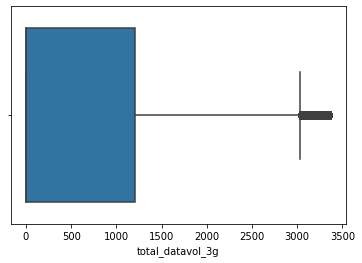

In [199]:
# Plotting the distributon
sns.boxplot(df["total_datavol_3g"]);

In [200]:
high = df["total_datavol_3g"].quantile(.8)
mid = df["total_datavol_3g"].quantile(.6)

high, mid

(1657.88, 226.17)

In [201]:
# Creating categoring based on 3g usage
def create_datausage_cat_3g(x):
    if x >= high:
        return "High"
    elif x< high and x>=mid:
        return "Medium"
    else:
        return "Low"

df["datausage_cat_3g"] = df["total_datavol_3g"].apply(create_datausage_cat_3g)

In [202]:
# Dropping total 3g usage column
df.drop("total_datavol_3g", axis = 1, inplace = True)

In [203]:
df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,churn,mou_cat_ic,mou_cat_og,datausage_cat_2g,datausage_cat_3g
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,220.246,225.491,213.803,34.31,32.33,4.03,96.31,91.735,24.59,0.00,0.00,0.00,0.00,0.00,0.00,0.65,0.69,0.00,5.83,6.38,1.56,0.00,0.00,0.00,0.0,0.0,0.00,10.41,11.36,3.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,38.39,37.43,12.94,1.71,2.18,0.74,12.14,14.34,7.78,0.00,0.00,1.15,21.99,25.36,14.63,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,36.39,41.23,24.78,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5,4,3,362,252,252,252,252,252,250,250,225,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0,0,0,0,0,0,1,1,1,0,0,968,30.40,0.00,101.20,0.9,252.0,252.0,252.0,1,Low,Low,Low,Medium
7000701601,994.099,995.859,977.345,57.84,54.68,52.29,453.43,567.160,325.91,16.23,14.29,15.01,23.74,12.59,28.88,51.39,31.38,40.28,308.63,421.88,162.28,16.13,16.29,15.16,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,1.66,1.65,1.28,60.86,75.14,77.84,4.5,0.0,6.50,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,38.01,39.94,36.61,427.88,355.23,188.04,31.21,11.83,28.24,67.54,69.48,62.94,4.03,4.33,3.78,107.34,109.93,99.98,626.46,558.04,428.74,0.21,2.06,14.53,13.55,1.08,1.48,1.13,5,5,7,1181,790,1148,274,274,252,10,0,225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,0.0,0.0,0.0,1,High,Medium,Low,Low
7001524846,378.721,492.223,142.680,413.69,351.03,35.08,94.66,80.630,136.48,0.00,0.00,0.00,0.00,0.00,0.00,187.93,190.84,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,4.58,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.0,10.23,0.0,508.36,431.66,171.56,23.84,9

In [204]:
df.shape

(30001, 143)

# 3. EDA and further data prederation

**Minutes of usage incoming category**

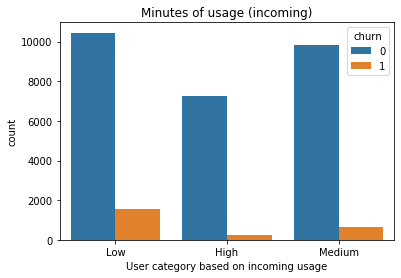

In [205]:
sns.countplot(x = df["mou_cat_ic"], hue= df["churn"])
plt.title("Minutes of usage (incoming)")
plt.xlabel("User category based on incoming usage")
plt.show()

- Customers with high minutes of usage (incoming) of calls are less in number who are churned.
- Customers with low minutes of usage (incoming) of calls are high in number whor are churned.

**Minutes of usage outgoing category**

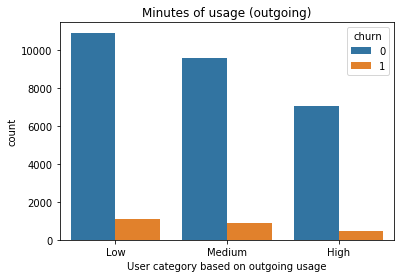

In [206]:
sns.countplot(x = df["mou_cat_og"], hue= df["churn"])
plt.title("Minutes of usage (outgoing)")
plt.xlabel("User category based on outgoing usage")
plt.show()

- Customers with high minutes of usage (outgoing) of calls are less in number who are churned.
- Customers with low minutes of usage (outgoing) of calls are high in number whor are churned.

**2G data user category**

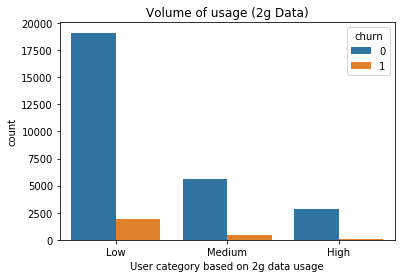

In [207]:
sns.countplot(x = df["datausage_cat_2g"], hue= df["churn"])
plt.title("Volume of usage (2g Data)")
plt.xlabel("User category based on 2g data usage")
plt.show()

- Customers with high volume 2g data usage are less in number who are churned.
- Customers with low volume 2g data usage are high in number who are churned.

**3G data user category**

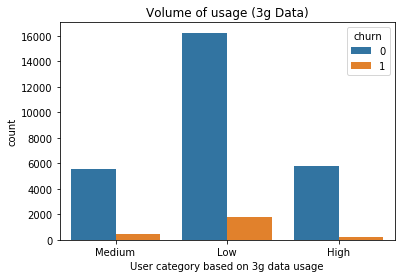

In [208]:
sns.countplot(x = df["datausage_cat_3g"], hue= df["churn"])
plt.title("Volume of usage (3g Data)")
plt.xlabel("User category based on 3g data usage")
plt.show()

- Customers with high volume 3g data usage are less in number who are churned.
- Customers with low volume 3g data usage are high in number who are churned.

**monthly 2g/3g**

In [209]:
# Filtering monthly 2g/3g columns for visualisation
monthly_2g3g = [col for col in df.columns if "monthly" in col]
monthly_2g3g

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8']

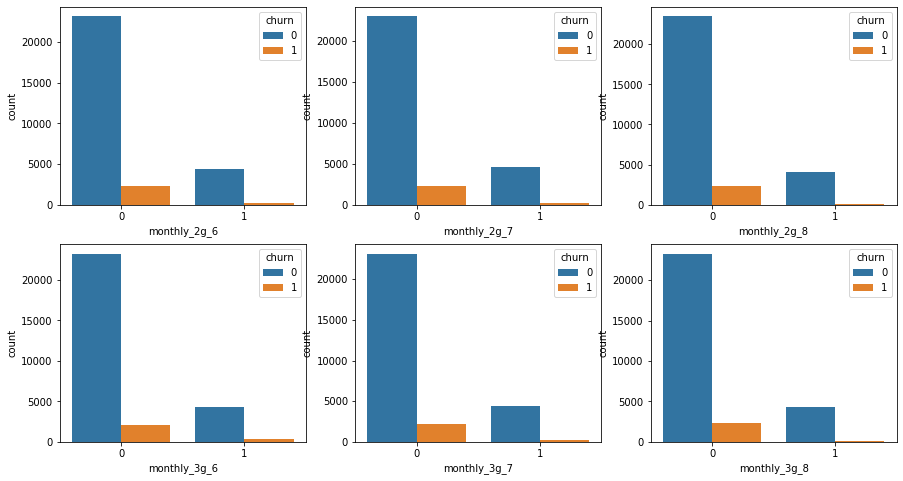

In [213]:
# Plotting the mothly 2g/3g counts 
plt.figure(figsize=(15,8))
for i,col in enumerate(monthly_2g3g):
    plt.subplot(2,3,i+1)
    sns.countplot(df[col], hue=df["churn"])

We can see that people who did not use the 2g/3g monthly service are more in number who were churned.

**Sachet 2g/3g**

In [84]:
# Creating a list of sachet 2g/3g column
sachet = [col for col in df.columns if "sachet" in col]
sachet

['sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6', 'sachet_3g_7']

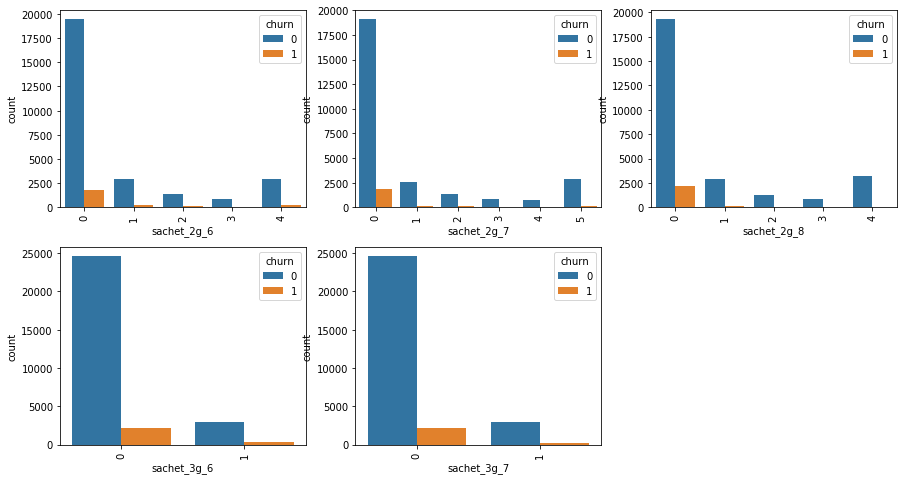

In [215]:
# Plotting the sachet 2g/3g counts
plt.figure(figsize=(15,8))
for i,col in enumerate(sachet):
    plt.subplot(2,3,i+1)
    sns.countplot(df[col], hue=df["churn"])
    plt.xticks(rotation=90)

- We can see that people who did not use the 2g/3g sachet, are more in number who were churned.
- Who used 3-4 times 2g sachet were less in number in terms of churn.

**Count recharge 2g/3g**

In [216]:
# Creating a list of 2g/3g recharge count
count = [col for col in df.columns if "count" in col]
count

['count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8']

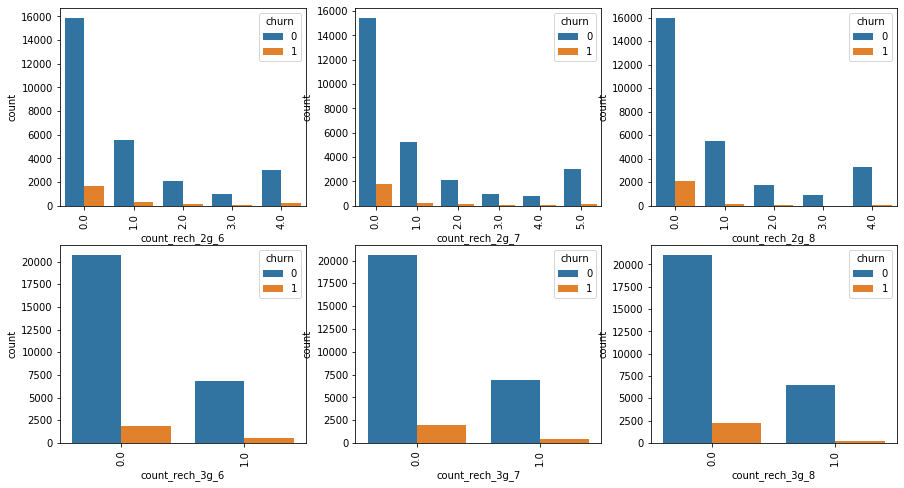

In [217]:
# Plotting count
plt.figure(figsize=(15,8))
for i,col in enumerate(count):
    plt.subplot(2,3,i+1)
    sns.countplot(df[col], hue=df["churn"])
    plt.xticks(rotation=90)

Here also we see the similar pattern. People who did not rechanrged or less number of data rechange are more in numbers who got churned.

**Total Recharge Numbers**

In [94]:
# Creating list of columns
total_rech_num = [col for col in df.columns if "total_rech_num" in col]
total_rech_num

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8']

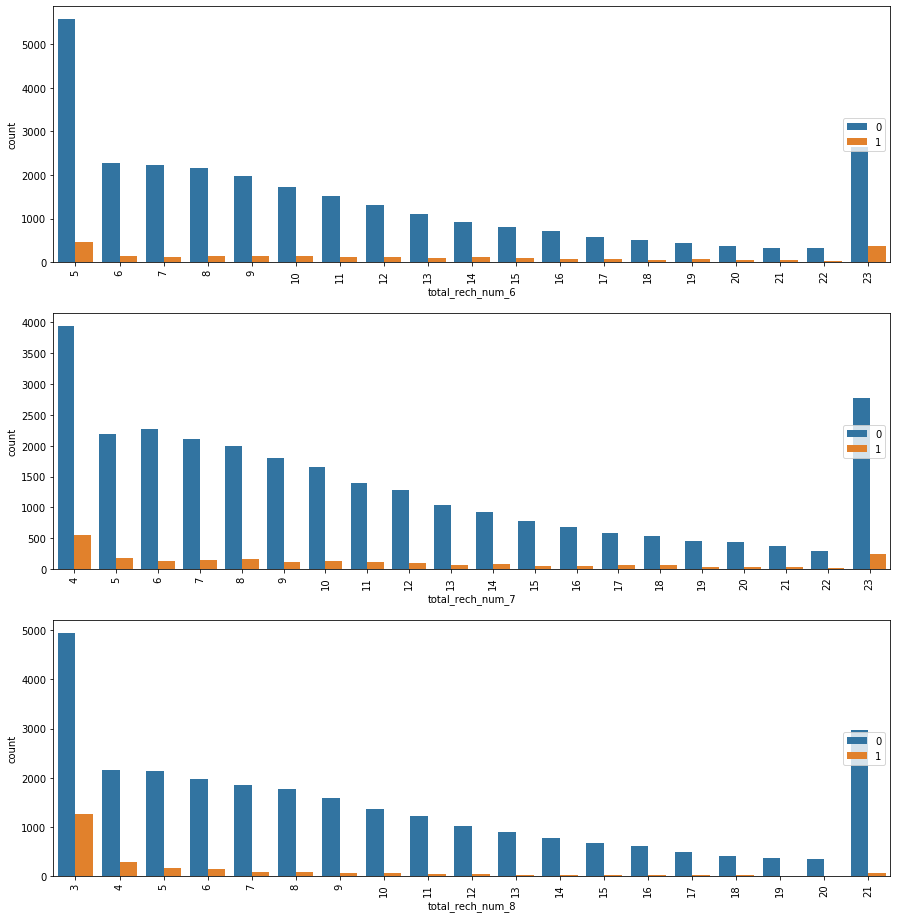

In [95]:
# Plotting the total recharge number during these 3 months
plt.figure(figsize=(15,16))
for i,col in enumerate(total_rech_num):
    plt.subplot(3,1,i+1)
    sns.countplot(df[col], hue=df["churn"])
    plt.xticks(rotation=90)
    plt.legend(loc="right")

- Most of the curners did recharge arounf 20 times.
- Those who recharged 8-9 times in month 6, are the highest churners.
- Those who recharged 5-9 times in month 7, are the highest churners.
- Those who did not rechanrged or recharged 1-4 times in month 6, are the highest churners.

In [96]:
# Creating non churn subset of the data frame
churn_0 = df.loc[df['churn'] == 0]
# Creating churn subset of the data frame
churn_1 = df.loc[df['churn'] == 1]

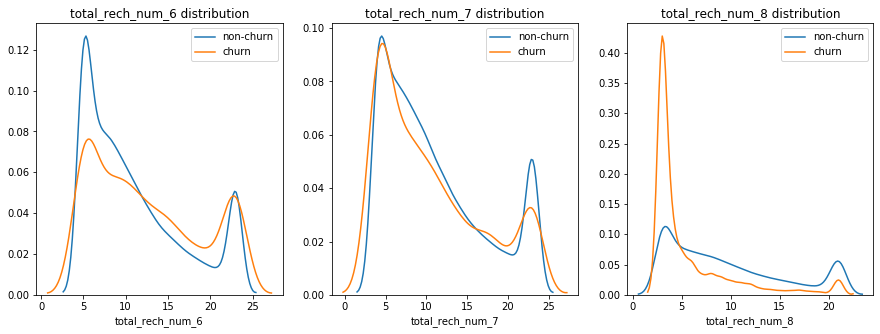

In [97]:
# Plotting the number of recharges distribution
plt.figure(figsize=(15,5))
for i,col in enumerate(total_rech_num):
    plt.subplot(1,3,i+1)
    sns.distplot(churn_0[col], hist=False, rug=False, label="non-churn")
    sns.distplot(churn_1[col], hist=False, rug=False, label="churn")
    plt.title(f"{col} distribution")
    plt.legend(loc="best")

We can see form the distribution that
- Crearly those who recharged less number of times in month 8 got churned in month 9.
- This is good indicator that if a person is recharging less number of time in month 8, has high chances to be churned.

**Total number of data recharge**

In [98]:
# Creating list of columns
total_rech_data = [col for col in df.columns if "total_rech_data" in col]
total_rech_data

['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8']

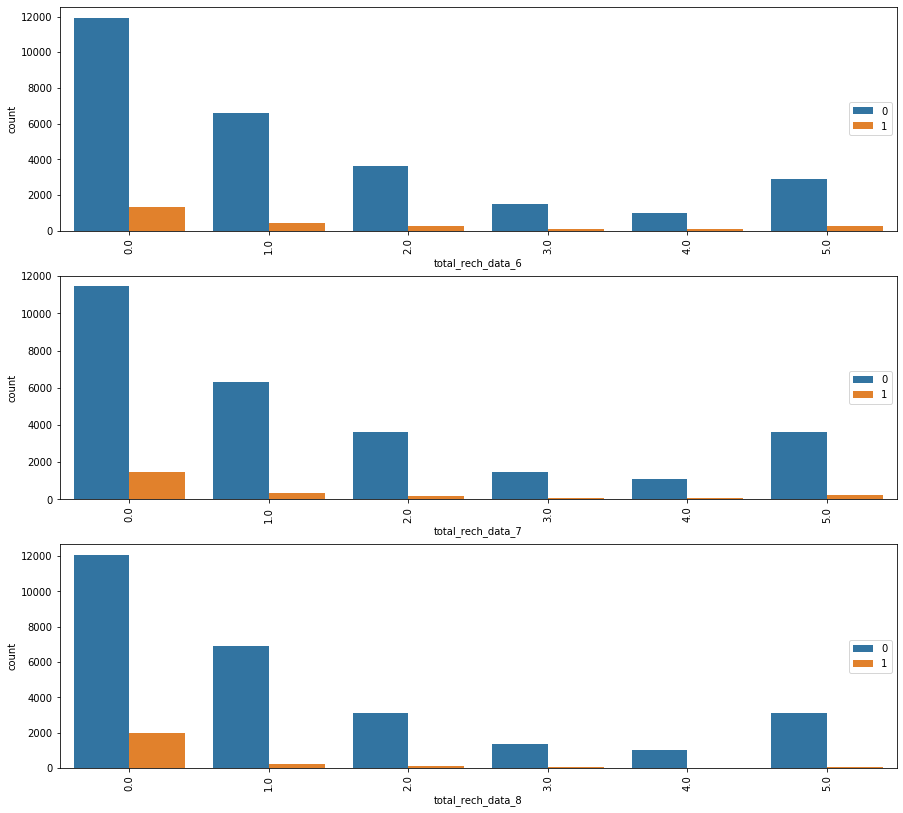

In [99]:
# Plotting the Total data recharge number during these 3 months
plt.figure(figsize=(15,14))
for i,col in enumerate(total_rech_data):
    plt.subplot(3,1,i+1)
    sns.countplot(df[col], hue=df["churn"])
    plt.xticks(rotation=90)
    plt.legend(loc="right")

- Less number of data recharge has high number of churn count.

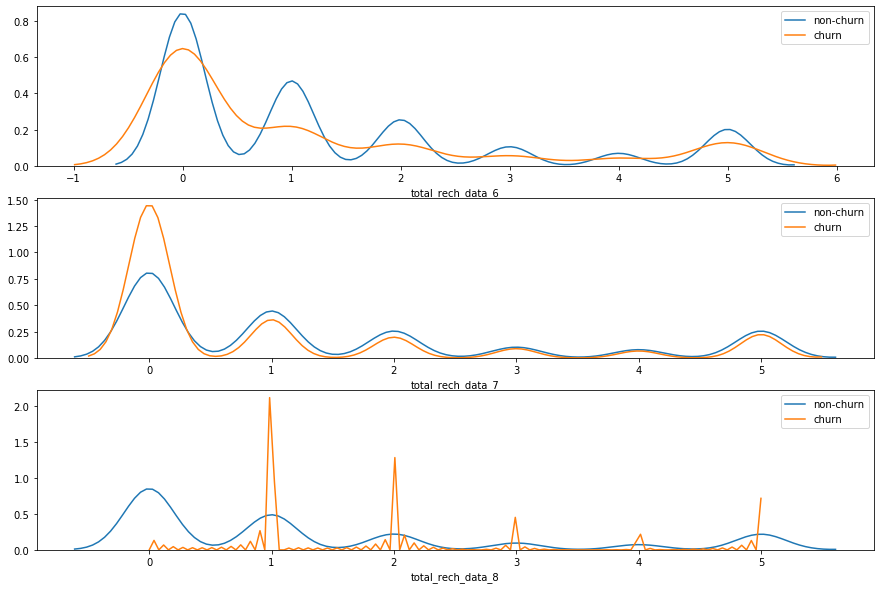

In [100]:
# Plotting the number of data recharges distribution
plt.figure(figsize=(15,10))
for i,col in enumerate(total_rech_data):
    plt.subplot(3,1,i+1)
    sns.distplot(churn_0[col], hist=False, rug=False, label="non-churn")
    sns.distplot(churn_1[col], hist=False, rug=False, label="churn")
    plt.legend(loc="best")

- The distribution got very interesting patterns. The customer who dis less number of data rechange in month 6 has high change to be churned.
- Customer who did not recharge in month 7, were the most churners. 

**Roaming Incoming and Outgoing**

**Age on network - number of days the customer is using the operator T network (aon)**

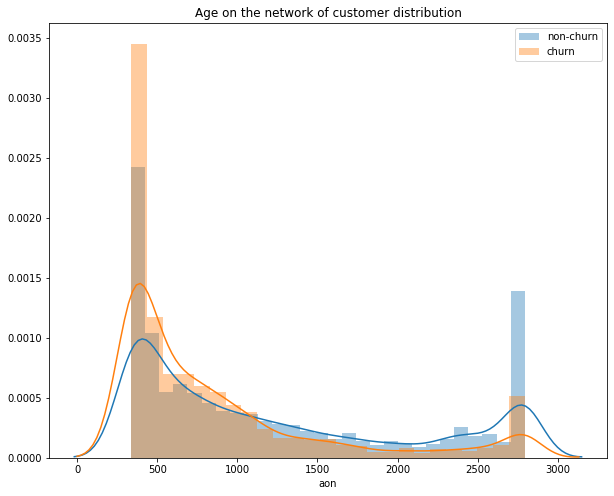

In [102]:
# Plotting distribution of aon
plt.figure(figsize=(10,8))
sns.distplot(churn_0["aon"], hist=True, rug=False, label="non-churn")
sns.distplot(churn_1["aon"], hist=True, rug=False, label="churn")
plt.title("Age on the network of customer distribution")
plt.legend(loc="best");

- We can see that around 300-500 days age bucket are most likely to be churned.

**Analysing all the data volumns usage columns with respect to total recharge of data amount**

In [103]:
vol_data = [col for col in df.columns if "vol" in col]
vol_data

['vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8']

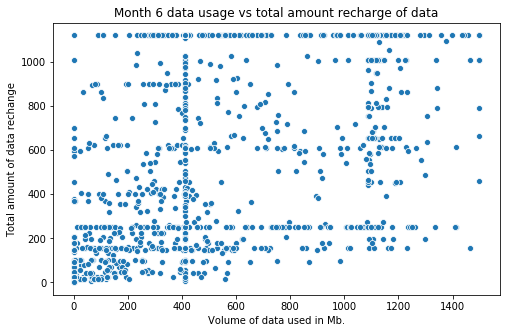

In [104]:
# Plotting month 6  data usage vs amount recharge
plt.figure(figsize=(8, 5))
sns.scatterplot(churn_1["vol_2g_mb_6"]+churn_1["vol_3g_mb_6"], churn_1["total_rech_amt_data_6"])
plt.title("Month 6 data usage vs total amount recharge of data")
plt.xlabel("Volume of data used in Mb.")
plt.ylabel("Total amount of data rechange")
plt.show()

- Total amount of data recharge has positive correlation with volume of data used.
- We can see most of the churners used below 10000 mb of data.
- Customers who recharged with less than 18000 are likely to be churn.
- We can assume that beyond 10000 mb data user and recharged with more than 20000 rs in month 6, are not going to churn.

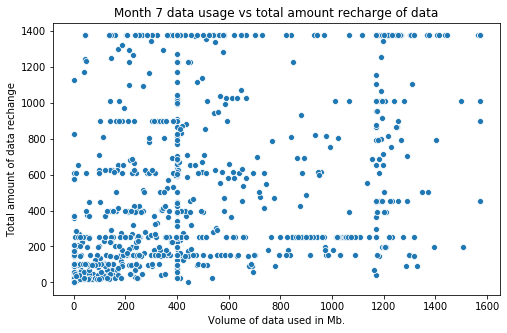

In [105]:
# Plotting month 7  data usage vs amount recharge
plt.figure(figsize=(8, 5))
sns.scatterplot(churn_1["vol_2g_mb_7"]+churn_1["vol_3g_mb_7"], churn_1["total_rech_amt_data_7"])
plt.title("Month 7 data usage vs total amount recharge of data")
plt.xlabel("Volume of data used in Mb.")
plt.ylabel("Total amount of data rechange")
plt.show()

- Total amount of data recharge has positive correlation with volume of data used.
- We can see most of the churners used below 10000 mb of data with one exception who at 15000mb.
- Customers who recharged with less than 10000rs are likely to be churn.
- We can assume that beyond 8000 mb data user and recharged with more than 10000 rs in month 7, has very less chance to be churned.

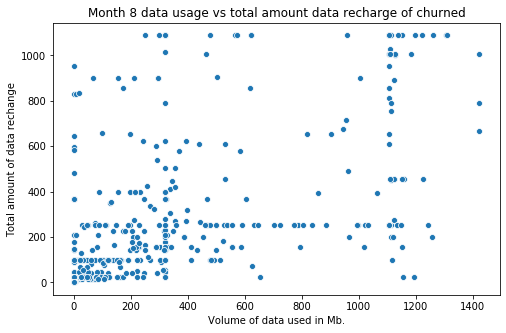

In [106]:
# Plotting month 8 data usage vs amount recharge
plt.figure(figsize=(8, 5))
sns.scatterplot(churn_1["vol_2g_mb_8"]+churn_1["vol_3g_mb_8"], churn_1["total_rech_amt_data_8"])
plt.title("Month 8 data usage vs total amount data recharge of churned")
plt.xlabel("Volume of data used in Mb.")
plt.ylabel("Total amount of data rechange")
plt.show()

- We can see that most of the churners used below 2000 mb of data in month 8.
- Also most of the churners recharged with less than 1000rs in month 8.

**ARPU**

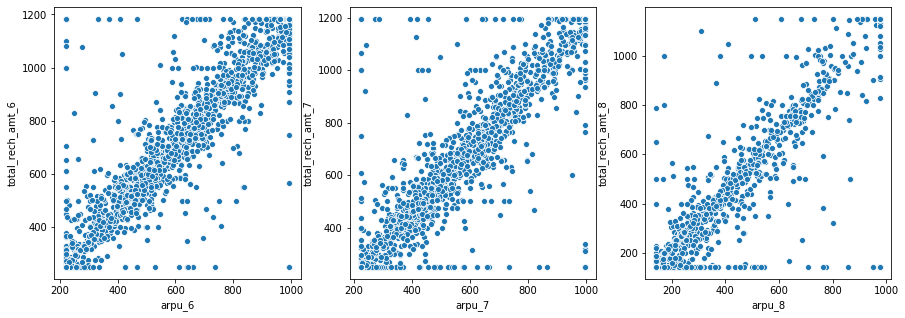

In [107]:
# Plotting 3 months arpu against total recharge of individual month
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
sns.scatterplot(churn_1["arpu_6"], churn_1["total_rech_amt_6"])
plt.subplot(1,3,2)
sns.scatterplot(churn_1["arpu_7"], churn_1["total_rech_amt_7"])
plt.subplot(1,3,3)
sns.scatterplot(churn_1["arpu_8"], churn_1["total_rech_amt_8"])
plt.show()

- Average rating is highly correlated with total recharge amount and this is obvious.
- arpu below 5000 in month 6 has more churners.
- Form month 7, arpu more than 5000 also churned.

**Onnet usage vs Offnet usage**

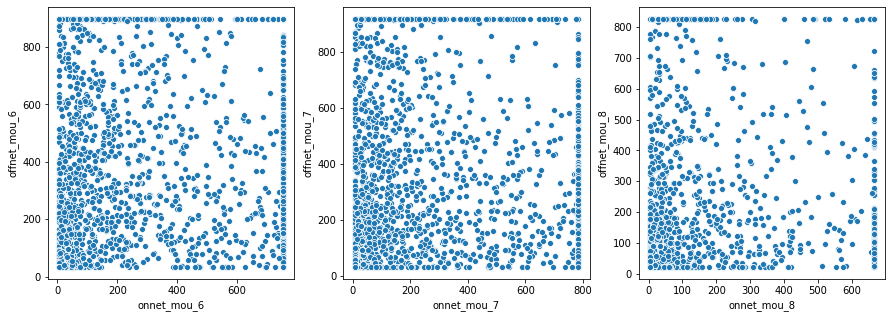

In [108]:
# Plotting 3 months arpu against total recharge of individual month
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
sns.scatterplot(churn_1["onnet_mou_6"], churn_1["offnet_mou_6"])
plt.subplot(1,3,2)
sns.scatterplot(churn_1["onnet_mou_7"], churn_1["offnet_mou_7"])
plt.subplot(1,3,3)
sns.scatterplot(churn_1["onnet_mou_8"], churn_1["offnet_mou_8"])
plt.show()

- Here the churn data is allover the place and not able to get much insight about the churn on month 6. But upto 4000 min onnet and offnet users got churned.
- On month 7 around 1500 to 4000 onnet user and below 2000 offnet users got churned.